# 100MLProjects - Project #1: Graduate Admissions Predicition

Dataset Source: https://www.kaggle.com/mohansacharya/graduate-admissions 

Date: June 12, 2020

### Lakshmanan Meiyappan
LinkedIn: https://www.linkedin.com/in/lakshmanan-meiyappan/

Github: https://github.com/laxmena/


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
dataset = pd.read_csv('/content/drive/My Drive/Dataset/GraduateAdmissions/Admission_Predict.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Exploring Dataset


There are 7 independent variables and 1 dependent variable.

GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA and Research are all non correlated to each other. 

My assumption now is Each single factor mentioned play a significant role towards the 'chance of admit'.

'Chance of Admit' is the probability of getting an admission for the given college for masters program.

### GRE Score

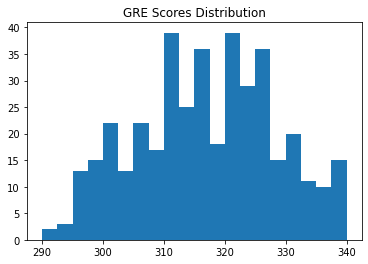

In [103]:
plt.hist(dataset.iloc[:,1].values, bins=20)
plt.title('GRE Scores Distribution')
plt.show()

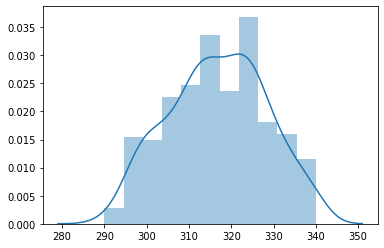

In [104]:
import seaborn as sns

sns.distplot(dataset.iloc[:,1].values)

In [105]:
# GRE Scores
gre_median = np.median(dataset.iloc[:,1].values)
gre_mean = np.mean(dataset.iloc[:,1].values)

print("GRE Scores Summary")
print("GRE Median: ", gre_median)
print("GRE Mean: ", gre_mean)

GRE Scores Summary
GRE Median:  317.0
GRE Mean:  316.8075


### TOEFL Score Distribution


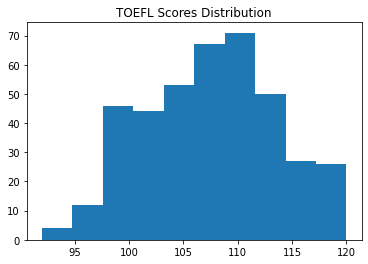

In [106]:
plt.hist(dataset.iloc[:,2].values)
plt.title('TOEFL Scores Distribution')
plt.show()

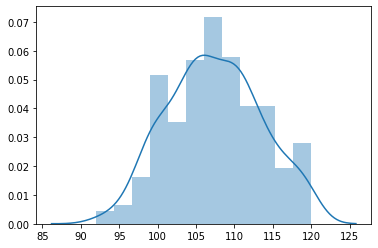

In [107]:
import seaborn as sns

sns.distplot(dataset.iloc[:,2].values)

In [108]:
# GRE Scores
toefl_median = np.median(dataset.iloc[:,2].values)
toefl_mean = np.mean(dataset.iloc[:,2].values)

print("TOEFL Scores Summary")
print("TOEFL Median: ", toefl_median)
print("TOEFL Mean: ", toefl_mean)

TOEFL Scores Summary
TOEFL Median:  107.0
TOEFL Mean:  107.41


### CGPA Distribution

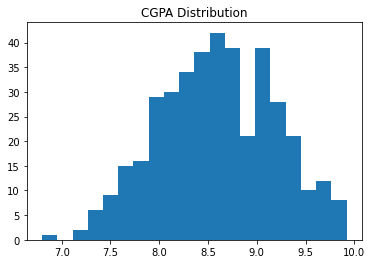

In [109]:
plt.hist(dataset.iloc[:,-3].values, bins=20)
plt.title('CGPA Distribution')
plt.show()

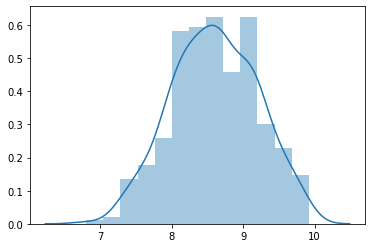

In [110]:
import seaborn as sns

sns.distplot(dataset.iloc[:,-3].values)

In [111]:
# GRE Scores
cgpa_median = np.median(dataset.iloc[:,-3].values)
cgpa_mean = np.mean(dataset.iloc[:,-3].values)

print("CGPA Scores Summary")
print("CGPA Median: ", cgpa_median)
print("CGPA Mean: ", cgpa_mean)

CGPA Scores Summary
CGPA Median:  8.61
CGPA Mean:  8.598925


### GRE vs Admit Probability

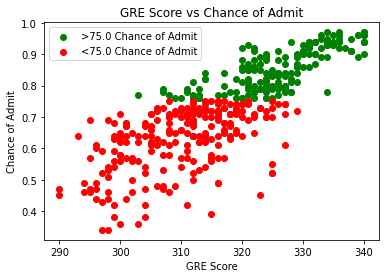

In [129]:
threshold = 0.75
plt.scatter(X[:,0][y>threshold], y[y>threshold], color='green', label='>' + str(threshold*100)+' Chance of Admit')
plt.scatter(X[:,0][y<=threshold], y[y<=threshold], color='red', label='<' + str(threshold*100)+' Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs Chance of Admit')
plt.legend()
plt.show()

### TOEFL vs Chance of Admit

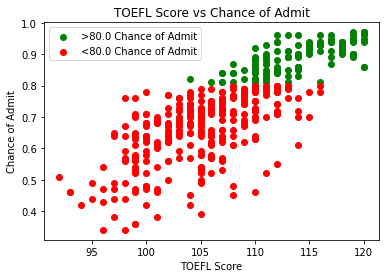

In [127]:
threshold = 0.8
plt.scatter(X[:,1][y>threshold], y[y>threshold], color='green', label='>' + str(threshold*100)+' Chance of Admit')
plt.scatter(X[:,1][y<=threshold], y[y<=threshold], color='red', label='<' + str(threshold*100)+' Chance of Admit')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs Chance of Admit')
plt.legend()
plt.show()

### GRE Score vs TOEFL Score

To compare How high scoring stuents GRE perform in TOEFL

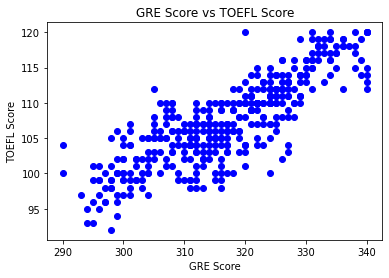

In [116]:
plt.scatter(X[:,0], X[:,1], color='blue')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.title('GRE Score vs TOEFL Score')
plt.show()

### CGPA vs Chance of Admit

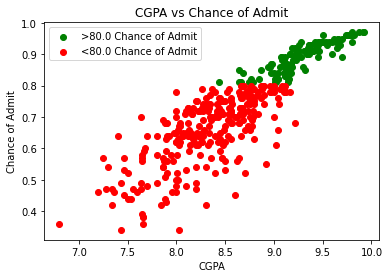

In [126]:
threshold = 0.8
plt.scatter(X[:,-2][y>threshold], y[y>threshold], color='green', label='>' + str(threshold*100)+' Chance of Admit')
plt.scatter(X[:,-2][y<=threshold], y[y<=threshold], color='red', label='<' + str(threshold*100)+' Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.title('CGPA vs Chance of Admit')
plt.legend()
plt.show()

### CGPA vs GRE Score
To Compare how Academically well performing students score on GRE

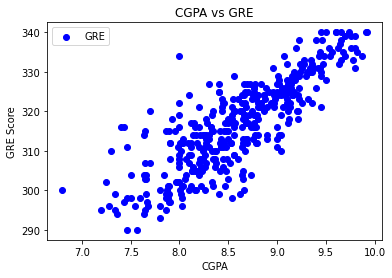

In [124]:
plt.scatter(X[:,-2], X[:,0], color='blue', label='GRE')
# plt.scatter(X_train[:,-2], X_train[:,0], color='blue', label='GRE')
# plt.scatter(X_train[:,-2], X_train[:,1], color='red', label='TOEFL')
plt.xlabel('CGPA')
plt.ylabel('GRE Score')
plt.title('CGPA vs GRE')
plt.legend()
plt.show()

## Split Dataset into Training and Test Dataset

In [0]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,1:8].values
y = dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

def feature_scaler(X):
  sc = StandardScaler()
  X[:,:-1] = sc.fit_transform(X[:,:-1])  
  return X

X_train = feature_scaler(X_train)
X_test = feature_scaler(X_test)

## Building Machine Learning Models

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor = linear_regressor.fit(X_train, y_train)

In [163]:
linear_regressor_score = linear_regressor.score(X_test, y_test)
print(round(linear_regressor_score*100, 2),'%')

84.33 %


In [164]:
print('Intercept: \n', linear_regressor.intercept_)
print('Coefficients: \n', linear_regressor.coef_)

Intercept: 
 0.7104976722362891
Coefficients: 
 [ 0.01717547  0.01868172  0.00792052 -0.00382472  0.02019396  0.06782186
  0.03056334]


### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor = decision_tree_regressor.fit(X_train, y_train)

In [166]:
decision_tree_score = decision_tree_regressor.score(X_test, y_test)
print(round(decision_tree_score*100, 2),'%')

66.38 %


In [0]:
tree.plot_tree(decision_tree_regressor)

### Random Forest Regression Model

In [0]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor = random_forest_regressor.fit(X_train, y_train)

In [168]:
random_forest_score = regressor.score(X_test, y_test)
print(round(random_forest_score*100, 2),'%')

72.11 %


### SVR Model

In [0]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')
svr_regressor = svr_regressor.fit(X_train, y_train)

In [170]:
svr_score = regressor.score(X_test, y_test)
print(round(svr_score*100, 2),'%')

72.11 %


In [174]:
df = pd.DataFrame({'Regression Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'SVR Model'],
                  'Accuracy Score': [linear_reg_score, decision_tree_score, random_forest_score, svr_score] },
                  columns= ['Regression Model', 'Accuracy Score'])
print(df)

           Regression Model  Accuracy Score
0         Linear Regression        0.843260
1  Decision Tree Regression        0.663821
2  Random Forest Regression        0.721148
3                 SVR Model        0.721148
